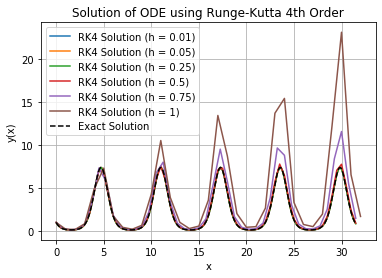

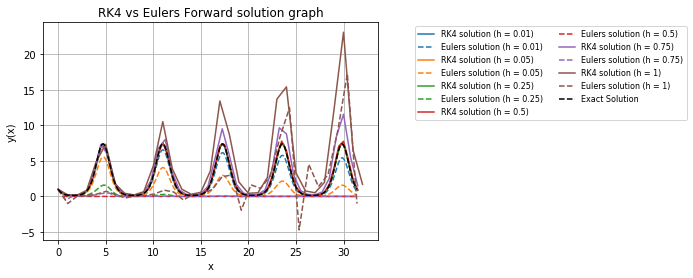

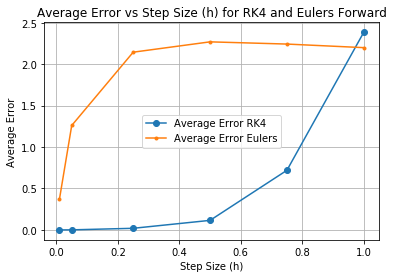

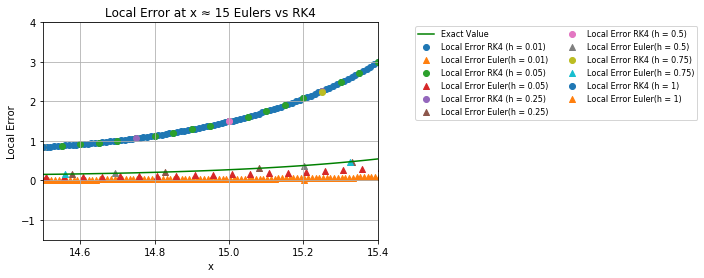

In [114]:
import numpy as np
import matplotlib.pyplot as plt
# Define the ODE function, for example, dy/dt = f(t, y) = -2 * t * y^2
#dy/dx = -2y*cos(x)
#answer: y = e^(-2sin(x))

def f(x, y):
    return (-2 * y * (np.cos(x)))

# Implement the RK4 method

def runge_kutta_4(f, y0, x0, xf, h):
    
    # Create an array for time steps
    
    x_values = np.arange(x0, xf + h, h)
    y_values = np.zeros(len(x_values))
    
    # Set the initial condition
    
    y_values[0] = y0
    
    # Perform the RK4 iteration
    
    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[i - 1]
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        
        # Update y based on the RK4 formula
        
        y_values[i] = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return x_values, y_values


# Define parameters
def eulers_method(f, y0, x0, xf, h):
    num_steps = int((xf - x0) / h)
    x_values = np.linspace(x0, xf, num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    # Initial condition
    y_values[0] = y0

    # Implement Euler's method
    for i in range(num_steps):
        y_values[i + 1] = y_values[i] + h * f(x_values[i], y_values[i])
    return x_values, y_values
    

# Set initial conditions and parameters

y0 = 1.0 # Initial value of y
x0 = 0.0 # Initial x
xf = 10*(np.pi) # Final x
h = [.01, .05, .25, .5, .75, 1] # Step size

#Exact Solution:
def exact_solution(x):
    return np.exp(-2*np.sin(x)) 

#PLOT 1 - RK4 for every value of h
for i in range (0, len(h)):
# Run the RK4 solver
    x_values, y_values = runge_kutta_4(f, y0, x0, xf, h[i])

    # Plot the results
    plt.plot(x_values, y_values, label=f'RK4 Solution (h = {h[i]})')
    
x_exact = np.linspace(x0, xf, 1000)
y_exact = exact_solution(x_exact)
plt.plot(x_exact, y_exact, 'k--', label=f'Exact Solution')
    
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solution of ODE using Runge-Kutta 4th Order')
plt.legend()
plt.grid(True)
plt.show()
#This plot demonstrates the variance of solutions with a higher step size h in the RK4 method, and the accuracy of lower step sizes

#PLOT 2 - RK4 vs Euler's
for i in range(0, len(h)): 
#Run the Euler's solver
    x_eulers, y_eulers = eulers_method(f, y0, x0, xf, h[i])
    x_values, y_values = runge_kutta_4(f, y0, x0, xf, h[i])
    
    plt.plot(x_values, y_values, label=f'RK4 solution (h = {h[i]})', linestyle='-', color=f'C{i}')
    
    # Plot Euler's method with dashed lines
    plt.plot(x_eulers, y_eulers, label=f'Eulers solution (h = {h[i]})', linestyle='--', color=f'C{i}')

plt.plot(x_exact, y_exact, 'k--', label=f'Exact Solution')
    
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('RK4 vs Eulers Forward solution graph')
plt.legend(prop={'size': 8}, ncol=2, loc='upper left', bbox_to_anchor=(1.1, 1))  # Smaller legend
plt.grid(True)
plt.show()
#This plot is a representation of the differences in solutions of Euler's Method vs RK4


#Defining local error also to run through list of values

def localerr(exact, values):
    return np.abs(values - exact)

#PLOT 3

#Interpolating so the x values are the same/line up - easier to represent data this way
from scipy.interpolate import interp1d

x_common = np.linspace(x0, xf, 1000)  # Common grid
y_exact_common = exact_solution(x_common)

average_errors = []
average_errors_eulers = []

for step_size in h:
    x_rk4, y_rk4 = runge_kutta_4(f, y0, x0, xf, step_size)
    x_euler, y_euler = eulers_method(f, y0, x0, xf, step_size)
    
    # Interpolate RK4 and Euler to common grid
    y_rk4_interp = interp1d(x_rk4, y_rk4, kind='linear', fill_value="extrapolate")(x_common)
    y_euler_interp = interp1d(x_euler, y_euler, kind='linear', fill_value="extrapolate")(x_common)

    # Compute errors on the common grid
    error_rk4 = np.abs(y_exact_common - y_rk4_interp)
    error_euler = np.abs(y_exact_common - y_euler_interp)

    average_errors.append(np.mean(error_rk4))
    average_errors_eulers.append(np.mean(error_euler))
    
    y_exact = exact_solution(x_rk4)

# Plot the average error vs step size
plt.plot(h, average_errors, marker='o', linestyle='-', label='Average Error RK4')
plt.plot(h, average_errors_eulers, marker='.', linestyle='-', label='Average Error Eulers')
plt.plot()
plt.xlabel('Step Size (h)')
plt.ylabel('Average Error')
plt.title('Average Error vs Step Size (h) for RK4 and Eulers Forward')
plt.grid(True)
plt.legend()
plt.show()
#This plot highlights the difference in error between RK4 and eulers- RK4 is generally more accurate, dominating the lower step sizes
#At a high step size like h = 1, there is little difference in error - this is because RK4 performs better at small step sizes
#The graph of euler's avg error increases quickly and slows down until it starts decreasing at .5
#The graph of RK4's avg error increases slowly at first, maintaining a positive acceleration throughout



#PLOT 4
for i in range (0, len(h)):
    x_values, y_values = runge_kutta_4(f, y0, 14.5, 15.4, h[i])
    x_euler, y_euler = eulers_method(f, y0, x0, xf, h[i])
    y_exact = exact_solution(x_values)
    y_exact_e = exact_solution(x_euler)
    
    localerror = localerr(y_exact, y_values)
    localerror_e = localerr(y_exact_e, y_euler)
    
    plt.scatter(x_values, localerror, label=f'Local Error RK4 (h = {h[i]})')
    plt.scatter(x_euler, localerror_e, marker='^', label = f'Local Error Euler(h = {h[i]})')
    
    if(i == 0):
        plt.plot(x_values, y_exact, color='green', label=f'Exact Value')
        
        
plt.xlim(14.5, 15.4) #graph was computing values and extending x-axis so I limited to the range we are analyzing
plt.ylim(-1.5,4)
plt.xlabel('x')
plt.ylabel('Local Error')
plt.title('Local Error at x ≈ 15 Eulers vs RK4')
plt.legend(prop={'size': 8}, ncol=2, loc='upper left', bbox_to_anchor=(1.1, 1))  # Smaller legend
plt.grid(True)
plt.show()
#The Euler's method plot is uncharacteristically accurate in this plot because it is more accurate than runge kutta 4 at critical points of first order derivatives
#Also step sizes for both Eulers and Rk4 return similar solutions - this is because even coarse approximations (high step sizes) 
#can account for the small derivative near the critical point, and adjust accordingly

#Overall, for smaller step sizes, RK4's higher accuracy is more apparent 
#as it resolves finer details of the solution, while Euler's method remains less accurate due to its first-order nature.
#Unless it is near a critical point
